In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

In [5]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


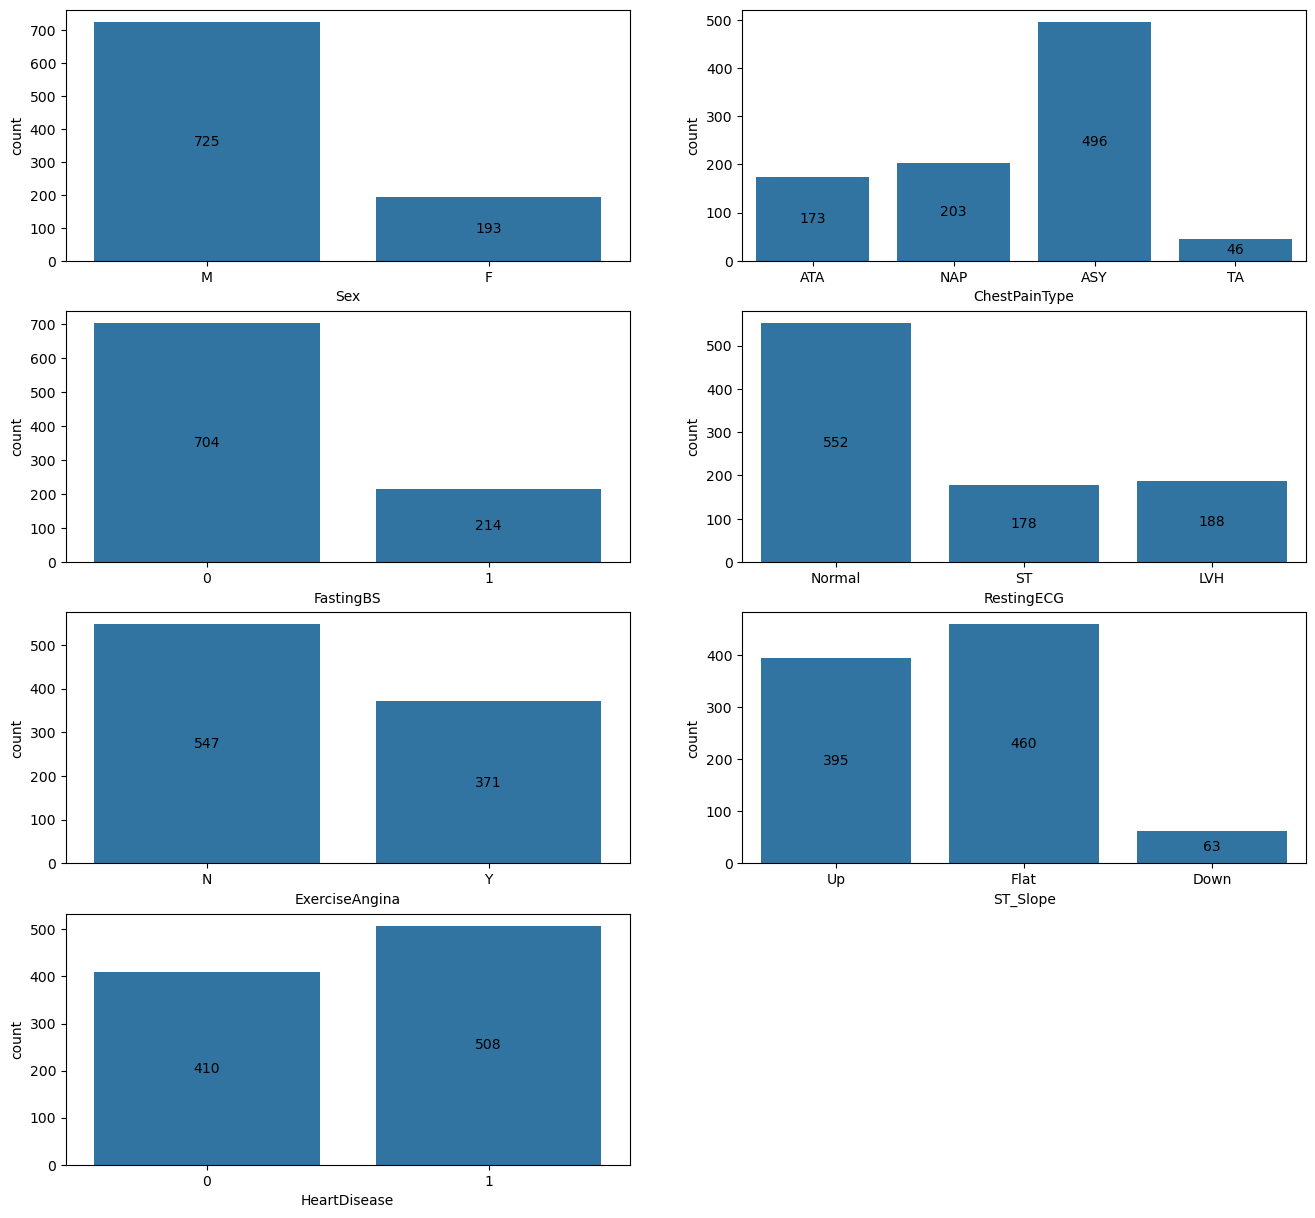

In [27]:
# dealing with categorical columns
cat_col = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']
fig = plt.figure(figsize=(16,15))

for idx,col in enumerate(cat_col):
    ax = plt.subplot(4,2,idx+1)
    sns.countplot(x=df[col], ax=ax)
    for container in ax.containers:
        ax.bar_label(container,label_type='center')

plt.show()

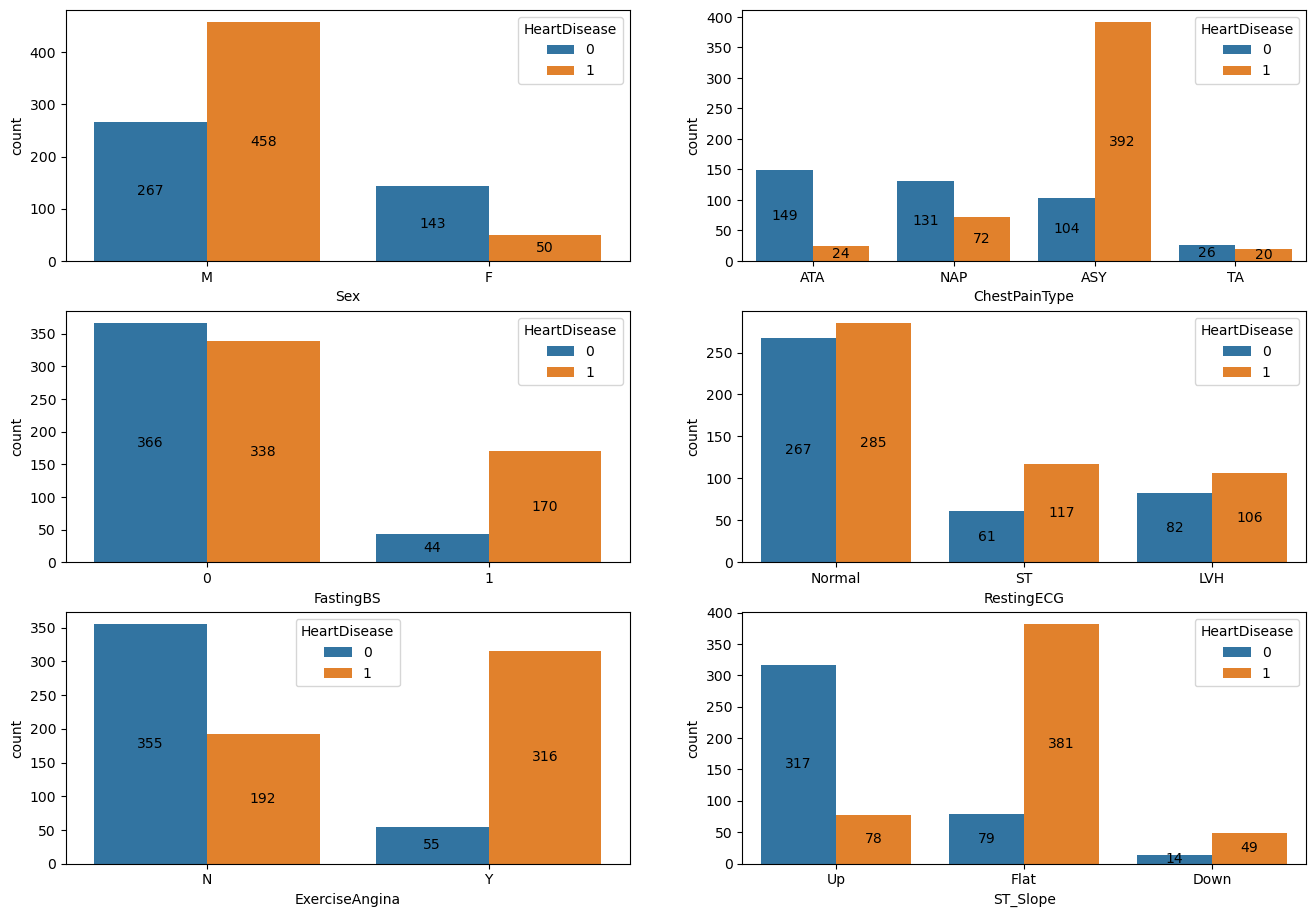

In [32]:
fig = plt.figure(figsize=(16,15))

for idx,col in enumerate(cat_col[:-1]):
    ax=plt.subplot(4,2,idx+1)
    sns.countplot(x=df[col], hue=df['HeartDisease'], ax=ax)
    for container in ax.containers:
        ax.bar_label(container,label_type='center')

plt.show()

In [33]:
# find the row with RestingBP=0
df[df['RestingBP']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 449 to 449
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1 non-null      int64  
 1   Sex             1 non-null      object 
 2   ChestPainType   1 non-null      object 
 3   RestingBP       1 non-null      int64  
 4   Cholesterol     1 non-null      int64  
 5   FastingBS       1 non-null      int64  
 6   RestingECG      1 non-null      object 
 7   MaxHR           1 non-null      int64  
 8   ExerciseAngina  1 non-null      object 
 9   Oldpeak         1 non-null      float64
 10  ST_Slope        1 non-null      object 
 11  HeartDisease    1 non-null      int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 104.0+ bytes


In [34]:
# find the row with Cholesterol=0
df[df['Cholesterol']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 293 to 536
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             172 non-null    int64  
 1   Sex             172 non-null    object 
 2   ChestPainType   172 non-null    object 
 3   RestingBP       172 non-null    int64  
 4   Cholesterol     172 non-null    int64  
 5   FastingBS       172 non-null    int64  
 6   RestingECG      172 non-null    object 
 7   MaxHR           172 non-null    int64  
 8   ExerciseAngina  172 non-null    object 
 9   Oldpeak         172 non-null    float64
 10  ST_Slope        172 non-null    object 
 11  HeartDisease    172 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.5+ KB


In [42]:
# data cleaning
clean = df.copy()
clean = clean[clean['RestingBP'] != 0]

hd_mask = clean['HeartDisease']==0

clean.loc[hd_mask,'Cholesterol'] = cholesterol_without_hd.replace(to_replace=0, value=cholesterol_without_hd.median())
clean.loc[~hd_mask, 'Cholesterol'] =  cholesterol_with_hd.replace(to_replace=0, value=cholesterol_with_hd.median())

cholesterol_without_hd = clean.loc[hd_mask,'Cholesterol']
cholesterol_with_hd = clean.loc[~hd_mask, 'Cholesterol']

In [43]:
clean[['RestingBP','Cholesterol']].describe()

,RestingBP,Cholesterol
count,917.000000,917.000000
mean,132.540894,239.700109
std,17.999749,54.352727
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


In [44]:
# one-hot encoding
clean = pd.get_dummies(clean,drop_first=True)
clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


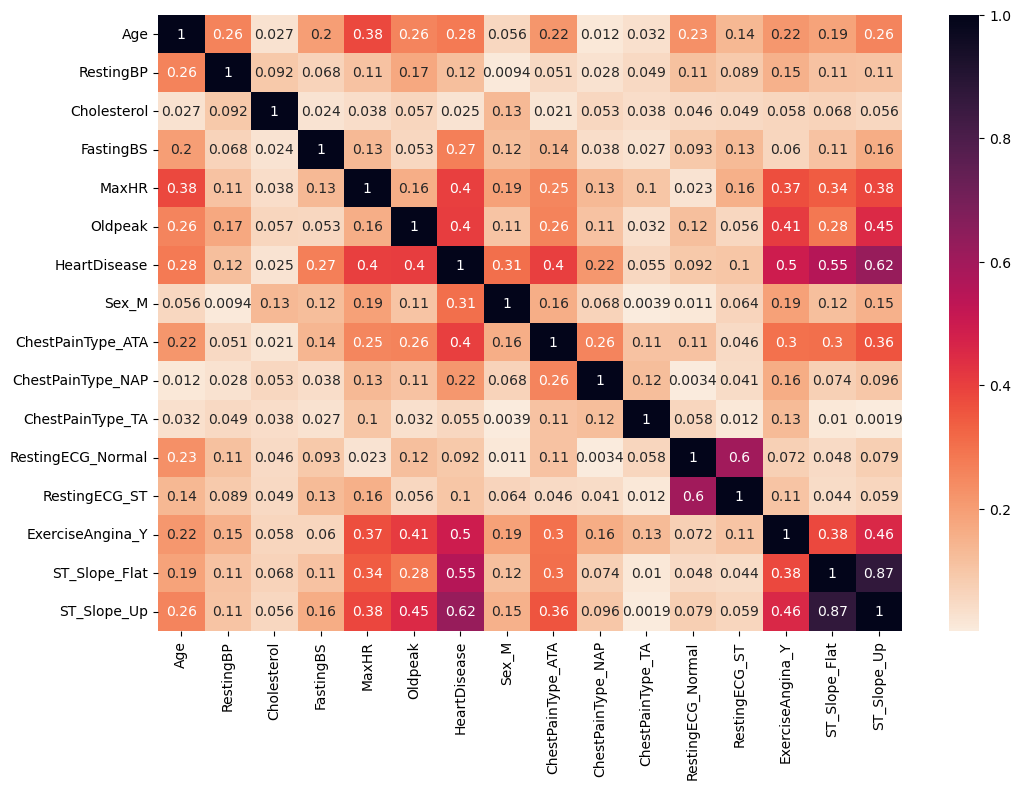

In [46]:
# correlations
correlations = abs(clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations,annot=True,cmap="rocket_r")
plt.show()

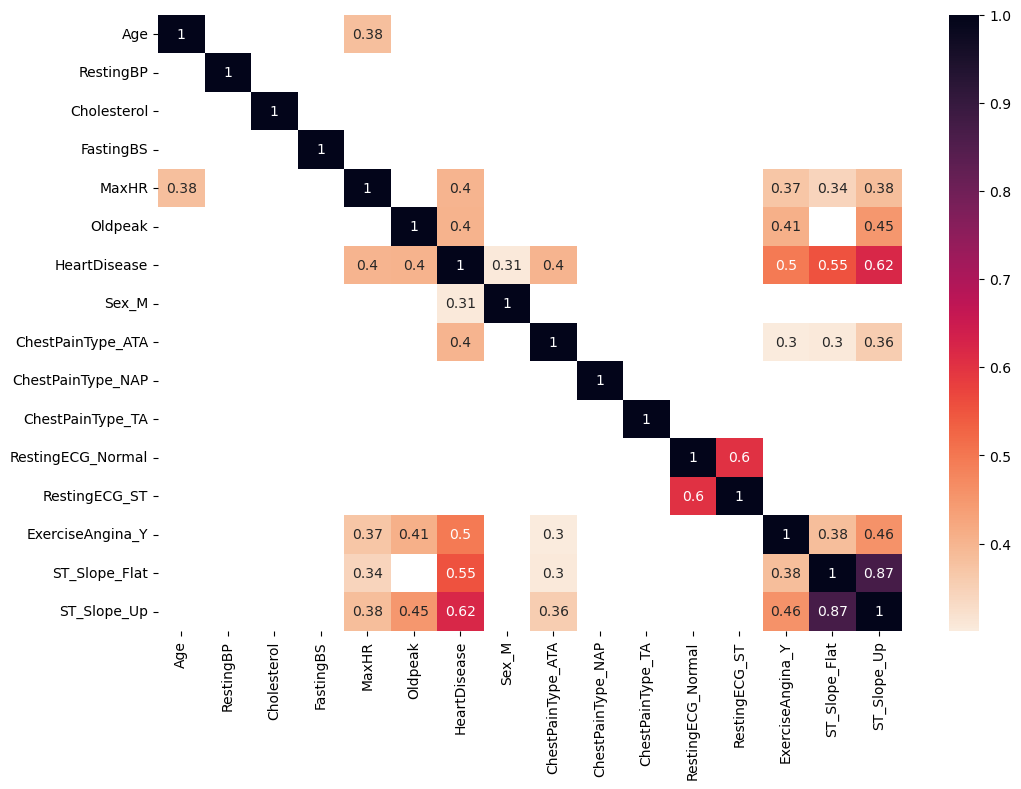

In [48]:
# correlations
correlations = abs(clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.3],annot=True,cmap="rocket_r")
plt.show()

In [51]:
# spliting data
X = clean.drop('HeartDisease',axis=1)
y = clean['HeartDisease']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

features = ['MaxHR','Oldpeak','Sex_M','ChestPainType_ATA','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']

# building model with only 1 feature at a time
for feature in features:
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[[feature]],y_train)
    accuracy=knn.score(X_test[[feature]],y_test)
    print(f"The KNN Classifier trained on {feature} and with k = 3 has accuracy of {accuracy*100}")

The KNN Classifier trained on MaxHR and with k = 3 has accuracy of 60.14492753623188
The KNN Classifier trained on Oldpeak and with k = 3 has accuracy of 62.31884057971014
The KNN Classifier trained on Sex_M and with k = 3 has accuracy of 68.11594202898551
The KNN Classifier trained on ChestPainType_ATA and with k = 3 has accuracy of 72.46376811594203
The KNN Classifier trained on ExerciseAngina_Y and with k = 3 has accuracy of 67.3913043478261
The KNN Classifier trained on ST_Slope_Flat and with k = 3 has accuracy of 75.36231884057972
The KNN Classifier trained on ST_Slope_Up and with k = 3 has accuracy of 78.26086956521739


In [53]:
# building model with all features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,y_train)
accuracy  =knn.score(X_test_scaled,y_test)
print(f"Accuracy: {accuracy*100 : .2f}")

Accuracy:  81.88


In [59]:
# hyperparameter
# spliting data
X = clean.drop('HeartDisease',axis=1)
y = clean['HeartDisease']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

features = ['MaxHR','Oldpeak',#'Sex_M'   #test whether this feature helps or hinders accuracy
            'ChestPainType_ATA','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

grid_params = {"n_neighbors": range(1,20),
              "metric": ["minkowski","manhattan"]
             }

knn = KNeighborsClassifier()
grid = GridSearchCV(knn,grid_params,scoring='accuracy')
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [60]:
grid.best_score_ * 100, grid.best_params_

(84.07692307692307, {'metric': 'manhattan', 'n_neighbors': 18})

In [66]:
# predict data
X_test_scaled = scaler.transform(X_test[features])
predictions = grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy on test set: {accuracy * 100 : .2f}")

Model accuracy on test set:  79.71


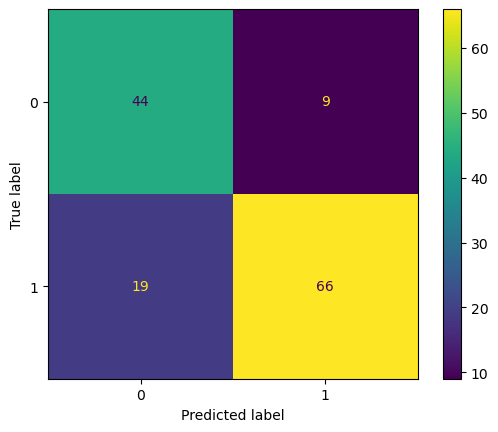

In [67]:
cf = confusion_matrix(y_test,predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()